In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import scikitplot as skplt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

/home/benoit/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Yannick

data = pd.read_csv('customers.csv')
print(data.shape)
print(data.dtypes)
data.head()


(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
DataFrame=data.copy()

DataFrame.gender=DataFrame.gender.replace("Male",1)
DataFrame.gender=DataFrame.gender.replace("Female",0)

DataFrame.Partner=DataFrame.Partner.replace("Yes",1)
DataFrame.Partner=DataFrame.Partner.replace("No",0)

DataFrame.Dependents=DataFrame.Dependents.replace("Yes",1)
DataFrame.Dependents=DataFrame.Dependents.replace("No",0)

DataFrame.PhoneService=DataFrame.PhoneService.replace("Yes",1)
DataFrame.PhoneService=DataFrame.PhoneService.replace("No",0)

DataFrame.MultipleLines=DataFrame.MultipleLines.replace("Yes",2)
DataFrame.MultipleLines=DataFrame.MultipleLines.replace("No",1)
DataFrame.MultipleLines=DataFrame.MultipleLines.replace("No phone service",0)

DataFrame.InternetService=DataFrame.InternetService.replace("Fiber optic",2)
DataFrame.InternetService=DataFrame.InternetService.replace("DSL",1)
DataFrame.InternetService=DataFrame.InternetService.replace("No",0)

DataFrame.OnlineSecurity=DataFrame.OnlineSecurity.replace("Yes",2)
DataFrame.OnlineSecurity=DataFrame.OnlineSecurity.replace("No",1)
DataFrame.OnlineSecurity=DataFrame.OnlineSecurity.replace("No internet service",0)

DataFrame.OnlineBackup=DataFrame.OnlineBackup.replace("Yes",2)
DataFrame.OnlineBackup=DataFrame.OnlineBackup.replace("No",1)
DataFrame.OnlineBackup=DataFrame.OnlineBackup.replace("No internet service",0)

DataFrame.DeviceProtection=DataFrame.DeviceProtection.replace("Yes",2)
DataFrame.DeviceProtection=DataFrame.DeviceProtection.replace("No",1)
DataFrame.DeviceProtection=DataFrame.DeviceProtection.replace("No internet service",0)

DataFrame.TechSupport=DataFrame.TechSupport.replace("Yes",2)
DataFrame.TechSupport=DataFrame.TechSupport.replace("No",1)
DataFrame.TechSupport=DataFrame.TechSupport.replace("No internet service",0)

DataFrame.StreamingTV=DataFrame.StreamingTV.replace("Yes",2)
DataFrame.StreamingTV=DataFrame.StreamingTV.replace("No",1)
DataFrame.StreamingTV=DataFrame.StreamingTV.replace("No internet service",0)

DataFrame.StreamingMovies=DataFrame.StreamingMovies.replace("Yes",2)
DataFrame.StreamingMovies=DataFrame.StreamingMovies.replace("No",1)
DataFrame.StreamingMovies=DataFrame.StreamingMovies.replace("No internet service",0)

DataFrame.Contract=DataFrame.Contract.replace("Two year",24)
DataFrame.Contract=DataFrame.Contract.replace("One year",12)
DataFrame.Contract=DataFrame.Contract.replace("Month-to-month",1)

DataFrame.PaperlessBilling=DataFrame.PaperlessBilling.replace("Yes",1)
DataFrame.PaperlessBilling=DataFrame.PaperlessBilling.replace("No",0)

DataFrame.PaymentMethod=DataFrame.PaymentMethod.replace("Electronic check",3)
DataFrame.PaymentMethod=DataFrame.PaymentMethod.replace("Mailed check",2)
DataFrame.PaymentMethod=DataFrame.PaymentMethod.replace("Bank transfer (automatic)",1)
DataFrame.PaymentMethod=DataFrame.PaymentMethod.replace("Credit card (automatic)",0)

DataFrame.TotalCharges=DataFrame.Contract*DataFrame.MonthlyCharges

DataFrame.Churn=DataFrame.Churn.replace("Yes",1)
DataFrame.Churn=DataFrame.Churn.replace("No",0)


DataFrame.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,1,...,1,1,1,1,1,1,3,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,1,2,...,2,1,1,1,12,0,2,56.95,683.40,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,2,...,1,1,1,1,1,1,2,53.85,53.85,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,2,...,2,2,1,1,12,0,1,42.30,507.60,0
4,9237-HQITU,0,0,0,0,2,1,1,2,1,...,1,1,1,1,1,1,3,70.70,70.70,1


In [4]:
print(DataFrame.dtypes)

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [5]:
for col in DataFrame.columns:
    print(DataFrame[col].value_counts(normalize=True))


7838-LAZFO    0.000142
4811-JBUVU    0.000142
8752-IMQOS    0.000142
3791-LGQCY    0.000142
4001-TSBTV    0.000142
                ...   
4608-LCIMN    0.000142
3656-TKRVZ    0.000142
5406-KGRMX    0.000142
8882-TLVRW    0.000142
4208-UFFGW    0.000142
Name: customerID, Length: 7043, dtype: float64
1    0.504756
0    0.495244
Name: gender, dtype: float64
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64
0    0.516967
1    0.483033
Name: Partner, dtype: float64
0    0.700412
1    0.299588
Name: Dependents, dtype: float64
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: tenure, Length: 73, dtype: float64
1    0.903166
0    0.096834
Name: PhoneService, dtype: float64
1    0.481329
2    0.421837
0    0.096834
Name: MultipleLines, dtype: float64
2    0.439585
1    0.343746
0    0.216669
Name: InternetService, dtype: float64
1    0.496663
2    0.286668
0    

In [6]:
print(DataFrame['Churn'].value_counts(normalize=True))

0    0.73463
1    0.26537
Name: Churn, dtype: float64


In [7]:
df = DataFrame.drop(columns=["customerID" ,"Churn"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,1,1,3,29.85,29.85
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,12,0,2,56.95,683.40
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,1,1,2,53.85,53.85
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,12,0,1,42.30,507.60
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,1,1,3,70.70,70.70


In [8]:
y = DataFrame["Churn"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [9]:
x = df.to_numpy()
y = y.to_numpy()
print(x, x)

[[0.0000e+00 0.0000e+00 1.0000e+00 ... 3.0000e+00 2.9850e+01 2.9850e+01]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 2.0000e+00 5.6950e+01 6.8340e+02]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 2.0000e+00 5.3850e+01 5.3850e+01]
 ...
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 3.0000e+00 2.9600e+01 2.9600e+01]
 [1.0000e+00 1.0000e+00 1.0000e+00 ... 2.0000e+00 7.4400e+01 7.4400e+01]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 1.0565e+02 2.5356e+03]] [[0.0000e+00 0.0000e+00 1.0000e+00 ... 3.0000e+00 2.9850e+01 2.9850e+01]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 2.0000e+00 5.6950e+01 6.8340e+02]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 2.0000e+00 5.3850e+01 5.3850e+01]
 ...
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 3.0000e+00 2.9600e+01 2.9600e+01]
 [1.0000e+00 1.0000e+00 1.0000e+00 ... 2.0000e+00 7.4400e+01 7.4400e+01]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 1.0565e+02 2.5356e+03]]


In [10]:
# SOrt Churn & no churn
no_churn = np.where(y==0)
churn = np.where(y==1)
x_no_churn = x[no_churn, :][0]
y_no_churn = y[no_churn]
x_churn = x[churn, :][0]
y_churn = y[churn]

In [11]:
print(x_no_churn.shape)
print(y_no_churn.shape)
print(x_churn.shape)
print(y_churn.shape)

(5174, 19)
(5174,)
(1869, 19)
(1869,)


In [12]:
# Swap line order
randomize1 = np.arange(x_no_churn.shape[0])
np.random.shuffle(randomize1)
x_no_churn = x_no_churn[randomize1]
y_no_churn = y_no_churn[randomize1]

randomize2 = np.arange(x_churn.shape[0])
np.random.shuffle(randomize2)
x_churn = x_churn[randomize2]
y_churn = y_churn[randomize2]

print(x_no_churn.shape)
print(y_no_churn.shape)
print(x_churn.shape)
print(y_churn.shape)

x_no_churn = x_no_churn[:x_churn.shape[0], :]
y_no_churn = y_no_churn[:x_churn.shape[0]]
print("Rebalancing (50% Chur 50% no churn)")

print(x_no_churn.shape)
print(y_no_churn.shape)
print(x_churn.shape)
print(y_churn.shape)

(5174, 19)
(5174,)
(1869, 19)
(1869,)
Rebalancing (50% Chur 50% no churn)
(1869, 19)
(1869,)
(1869, 19)
(1869,)


In [13]:
train_ratio = 0.75
split_churn = int(x_churn.shape[0]*train_ratio)
split_no_churn = int(x_no_churn.shape[0]*0.75)
print(split_churn)
print(split_no_churn)

# Train set
x_train = np.concatenate((x_no_churn[:split_no_churn, :], x_churn[:split_churn, :]), axis=0)
y_train = np.concatenate((y_no_churn[:split_no_churn], y_churn[:split_churn]))

randomize3 = np.arange(x_train.shape[0])
np.random.shuffle(randomize3)
x_train = x_train[randomize3]
y_train = y_train[randomize3]

# Test set
x_test = np.concatenate((x_no_churn[split_no_churn:, :], x_churn[split_churn:, :]), axis=0)
y_test = np.concatenate((y_no_churn[split_no_churn:], y_churn[split_churn:]))

randomize4 = np.arange(x_test.shape[0])
np.random.shuffle(randomize4)
x_train = x_test[randomize4]
y_train = y_test[randomize4]

1401
1401


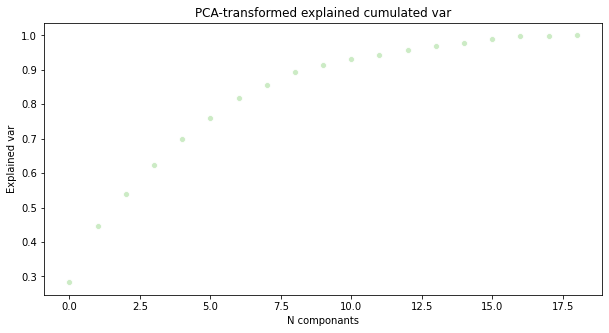

(936, 19)
PCA
(936, 10)


In [14]:
scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

pca = PCA()
pca.fit(scaled_x_train)
var_explained=np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(data=var_explained,color=sns.color_palette("Pastel1")[2])
ax.set(xlabel='N componants', ylabel='Explained var')
plt.title("PCA-transformed explained cumulated var")
plt.show()

# 10 for 90%
pca = PCA(n_components=10)
pca.fit(scaled_x_train)
var_explained=np.cumsum(pca.explained_variance_ratio_)

input_x_train = pca.transform(scaled_x_train)
input_x_test = pca.transform(scaled_x_test)

print(scaled_x_test.shape)
print("PCA")
print(input_x_test.shape)

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(input_x_train, y_train)
y_pred = clf.predict(input_x_test)

In [16]:

def result_analysis(y: np.ndarray, y_pred: np.ndarray):
    
    Recall = recall_score(y,y_pred) #true positif/(true positif+false negatif)
    Precision = precision_score(y,y_pred) #=true positif/(true positif+false positive)
    Fscore = 2*(Precision*Recall)/(Precision+Recall) #Classique Classifier score
    Conf = confusion_matrix(y, y_pred)
    Confshow = skplt.metrics.plot_confusion_matrix(y, y_pred, normalize=True)

    print("Prediction success of", Precision*100,"% is obtained !")
    print("This classifier has a F-score of", Fscore)
    print("Mean of" ,np.mean(y)*100,"% have truly churned whereas", np.mean(y_pred)*100, "% is predicted")

Prediction success of 82.05128205128204 % is obtained !
This classifier has a F-score of 0.7804878048780488
Mean of 55.12820512820513 % have truly churned whereas 50.0 % is predicted


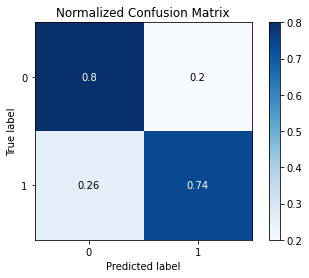

In [17]:
result_analysis(y_pred, y_test)

In [18]:
sklearn.neighbors.KNeighborsClassifier(50).fit(input_x_train, y_train)
y_guessed = sklearn.neighbors.KNeighborsClassifier.predict(input_x_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_guessed)
plt.plot(fpr, tpr)

results = [sensitivity_score(y_test, y_guessed), accuracy_score(y_test, y_guessed), precision_score(y_test, y_guessed)]
columns = ('sensitivity', 'accuracy', 'precision')
plt.table(cellText = results, colLabels = columns)
plt.show()

NameError: name 'sklearn' is not defined

In [ ]:
# Cedric Benoit
sklearn.neighbors.KNeighborsClassifier(5).fit(input_x_train, y_train) 
# je me dit on peut tester les nearest neighbors et varier la taille de recherche de voisin (genre 5 et 50), ça change un peu de ce que fait le prof
y_guessed = sklearn.neighbors.KNeighborsClassifier.predict(input_x_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_guessed)
plt.plot(fpr, tpr)

results = [sensitivity_score(y_test, y_guessed), accuracy_score(y_test, y_guessed), precision_score(y_test, y_guessed)]
columns = ('sensitivity', 'accuracy', 'precision')
plt.table(cellText = results, colLabels = columns)
plt.show()


#Train, Test
#Analyze results for best parameters
#Result y, y_pred
